# Chatbot Data (Combined 298A and 298B)

In [ ]:
#import locale
#locale.getpreferredencoding = lambda:"UTF-8"
#locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

!pip install textattack
!pip3 install pygobject
!pip3 install gTTS pyttsx3 playsound
!pip3 install python-vlc
!pip3 install SpeechRecognition pydub
!pip install --upgrade smart_open

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.7/418.7 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 86.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 77.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 32.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.6/344.6 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pycairo (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7019 

# Installing and Importing Libraries

In [ ]:
import re
import base64
import requests
from sys import argv, stdin
import os
import yaml
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from textattack.augmentation import WordNetAugmenter
import pickle

from gtts import gTTS
import IPython
import speech_recognition as sr
from pydub import AudioSegment

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import layers, activations, models, preprocessing, utils
from keras.utils import pad_sequences
from keras.layers import Input,Embedding,Bidirectional,LSTM,Dense,Concatenate
from keras.models import Model
tf.keras.utils.set_random_seed(1234)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import nltk
nltk.download('stopwords')

import csv
import random
import unicodedata
import codecs
import itertools
from __future__ import absolute_import, division, print_function, unicode_literals

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pickle # save model
path = '/content/drive/My Drive/ColabNotebooks/298B_Data_Add_New/'

# Raw Audio-Text Data Conversion

## **Text -> Audio**

There are several APIs available to convert text to speech in Python. One of such APIs is the Google Text to Speech API commonly known as the gTTS API. gTTS is a very easy to use tool which converts the text entered, into audio which can be saved as a mp3 file.

In [ ]:
mytext = 'Can I get a green tea?'
language = 'en'
  
# Passing the text and language to the engine, 
# here we have marked slow=False. Which tells the module that the converted audio should have a high speed
myobj = gTTS(text=mytext, lang=language, slow=False)
  
# Saving the converted audio in a wav file 
myobj.save("order.mp3")
 
# Playing the audio
IPython.display.Audio('order.mp3')

## **Audio -> Text**

There are many different kinds of speech recognizers. In this project we use Google Speech Recognizer
(GSR) which is offered by Google Inc for free. GSR will convert audio to text.

In [ ]:
# ensure audio file is in wav format for GSR                                                                         
src = "order.mp3"
dst = "order.wav"

                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='order.wav'>

In [ ]:
# initialize the recognizer
#r = sr.Recognizer()

# open the audio file
#with sr.AudioFile(dst) as source:
#    try:            
#          audio_data = r.record(source)
#          text = r.recognize_google(audio_data, language='en')
          #print(text)

    # If google could not understand the audio
#    except sr.UnknownValueError:
#          print("------GR couldn't understand:", dst, "but was able to convert:", text)

    # If the results cannot be requested from Google
    # Probably an internet connection error.
#    except sr.RequestError as e:
#          print("Could not request results.") 

# Barista Data Loading

Using parse_candidates functions as below, we loaded the txt files in python.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# barista file path
path_1 = '/content/drive/My Drive/ColabNotebooks/data/Barista/barista-task1-greetings-trn.txt'
path_2 = '/content/drive/My Drive/ColabNotebooks/data/Barista/barista-task2-order-drink-no-greetings-trn.txt'
path_3 = '/content/drive/My Drive/ColabNotebooks/data/Barista/barista-task3-order-drink-no-greetings-changes-trn.txt'
path_4 = '/content/drive/My Drive/ColabNotebooks/data/Barista/barista-task4-order-all-no-greetings-trn.txt'
path_5 = '/content/drive/My Drive/ColabNotebooks/data/Barista/barista-task5-order-all-no-greetings-changes-trn.txt'
path_6 = '/content/drive/My Drive/ColabNotebooks/data/Barista/barista-task6-order-all-with-greetings-trn.txt'
path_7 = '/content/drive/My Drive/ColabNotebooks/data/Barista/barista-task7-order-all-with-greetings-changes-trn.txt'

Mounted at /content/drive


In [ ]:
# function reads text file
def parse_candidates(filename):
    with open(filename, 'r') as f:
        return [' '.join(line.strip().split(' ')[1:]) for line in f]

# barista

text_1 = parse_candidates(path_1)
text_2 = parse_candidates(path_2)
text_3 = parse_candidates(path_3)
text_4 = parse_candidates(path_4)
text_5 = parse_candidates(path_5)
text_6 = parse_candidates(path_6)
text_7 = parse_candidates(path_7)
all_barista = text_1 + text_2 + text_3 + text_4 + text_5 + text_6 + text_7
all_barista[4999:5005] # sample

['',
 'A mocha .\tWhich size ?',
 'Medium .\tWould you like anything else with that ?',
 'Just the drink .\tSo that would be a medium mocha . Is that right ?',
 'Sounds good !\tYour order will be ready at the next counter .',
 '']

# Barista Data Cleaning

We separate questions from answers by converting the original text file into two sequences, one for questions, one for answers.

In [ ]:
def parse_dialogs(filename):
    q = []
    a = []

    for line in filename:
        if line.strip() == '':
            continue
        else:
            splitted = line.strip().split('\t')
            if len(splitted) == 2:
                user_utt, bot_utt = splitted
                q.append(user_utt)
                a.append(bot_utt)
            else:
                continue

    return q, a

q1, a1 = parse_dialogs(text_1)
q2, a2 = parse_dialogs(text_2)
q3, a3 = parse_dialogs(text_3)
q4, a4 = parse_dialogs(text_4)
q5, a5 = parse_dialogs(text_5)
q6, a6 = parse_dialogs(text_6)
q7, a7 = parse_dialogs(text_7)

questions = q1+q2+q3+q4+q5+q6+q7
answers = a1+a2+a3+a4+a5+a6+a7
print(len(questions), len(answers))

36265 36265


In [ ]:
questions[6000:6012] # sample

['Could I get a black tea , please ?',
 'Large cup .',
 'No , that is it .',
 'Sounds good !',
 'A hot chocolate , please .',
 'Small would do .',
 'Just the drink , please .',
 'Yeap .',
 'A black tea .',
 'Medium , thank you !',
 'That would be it .',
 'Yes !']

In [ ]:
answers[6000:6012] # sample

['Which size ?',
 'Would you like anything else with that ?',
 'So that would be a large black tea . Is that right ?',
 'Your order will be ready at the next counter .',
 'Which size ?',
 'Would you like anything else with that ?',
 'So that would be a small hot chocolate . Is that right ?',
 'Your order will be ready at the next counter .',
 'Which size ?',
 'Would you like anything else with that ?',
 'So that would be a medium black tea . Is that right ?',
 'Your order will be ready at the next counter .']

In [ ]:
barista = {'Question': questions, 'Answer': answers}
barista_df = pd.DataFrame(barista)

print(barista_df.iloc[5000:5007,:])

                       Question  \
5000  I would like a cordusio .   
5001          Medium would do .   
5002              No , thanks .   
5003                     Yeah .   
5004      A caramel macchiato .   
5005                Small cup .   
5006         That would be it .   

                                                 Answer  
5000                                       Which size ?  
5001           Would you like anything else with that ?  
5002  So that would be a medium cordusio . Is that r...  
5003     Your order will be ready at the next counter .  
5004                                       Which size ?  
5005           Would you like anything else with that ?  
5006  So that would be a small caramel macchiato . I...  


In [ ]:
print(barista_df.shape)
print("="*60)
print(barista_df.info())
print("="*60)
barista_df.describe()

(36265, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36265 entries, 0 to 36264
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  36265 non-null  object
 1   Answer    36265 non-null  object
dtypes: object(2)
memory usage: 566.8+ KB
None


,Question,Answer
count,36265,36265
unique,1401,1792
top,Sounds good !,Which size ?
freq,911,6000


In [ ]:
barista_df

,Question,Answer
0,Hey !,Hello ! Which drink can I get for you ?
1,That is correct .,Great ! Can I take your name ? api_call getCus...
2,Keri Russell .,"Your order will be ready at the next counter ,..."
3,Thank you !,Have a nice day !
4,Hello !,Hello ! Which drink can I get for you ?
...,...,...
36260,Medium would do .,Would you like anything else with that ?
36261,I would like a blueberry oatmeal .,So that would be a medium americano and a blue...
36262,Sounds good !,Great ! Can I take your name ? api_call getCus...
36263,It is Johnny Depp .,"Your order will be ready at the next counter ,..."


In [ ]:
# text preprocessing - lowercase + remove char not english or numbers
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
                "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", 
                "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  
                "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
                "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", 
                "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
                "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
                "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
                "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", 
                "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                "you'll've": "you will have", "you're": "you are", "you've": "you have"}

#remove_stop = True for questions
#remove_stop = False for answers
def preprocess_text(text,remove_stop):
    text = text.lower()
    text = ' '.join([contractions[word] if word in contractions else word for word in text.split()])
    text = re.sub(r'[^a-zA-Z0-9]',' ',text)
    if remove_stop == True:
        text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([word for word in text.split()])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
barista_df.Question = barista_df.Question.apply(preprocess_text,remove_stop=False)
barista_df.Answer = barista_df.Answer.apply(preprocess_text,remove_stop=False)
barista_df

,Question,Answer
0,hey,hello which drink can i get for you
1,that is correct,great can i take your name api call getcustome...
2,keri russell,your order will be ready at the next counter keri
3,thank you,have a nice day
4,hello,hello which drink can i get for you
...,...,...
36260,medium would do,would you like anything else with that
36261,i would like a blueberry oatmeal,so that would be a medium americano and a blue...
36262,sounds good,great can i take your name api call getcustome...
36263,it is johnny depp,your order will be ready at the next counter j...


# Movie Data Loading

In [ ]:
Mlines = open('/content/drive/My Drive/ColabNotebooks/data/OtherConversation/movie_lines.txt',encoding = 'utf-8', errors = 'ignore').read().split('\n')
Mconversations = open('/content/drive/My Drive/ColabNotebooks/data/OtherConversation/movie_conversations.txt',encoding = 'utf-8', errors = 'ignore').read().split('\n')

In [ ]:
Mlines

['L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!',
 'L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!',
 'L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.',
 'L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?',
 "L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.",
 'L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow',
 "L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.",
 'L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No',
 'L870 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?',
 'L869 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Like my fear of wearing pastels?',
 'L868 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ The "real you".',
 'L867 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ What good stuff?',
 "L866 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ I figured yo

In [ ]:
Mconversations

["u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L199']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L200', 'L201', 'L202', 'L203']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L204', 'L205', 'L206']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L207', 'L208']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L271', 'L272', 'L273', 'L274', 'L275']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L276', 'L277']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L280', 'L281']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L363', 'L364']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L365', 'L366']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L367', 'L368']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L401', 'L402', 'L403']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L404', 'L405', 'L406', 'L407']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L575', 'L576']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L577', 'L578']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L662', 'L663']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L693', 'L69

# Movie Data Cleaning

In [ ]:
# visualizing some lines
with open('/content/drive/My Drive/ColabNotebooks/data/OtherConversation/movie_lines.txt',encoding = 'utf-8', errors = 'ignore') as file:
    lines = file.readlines()
for line in lines[:10]:
    print(line.strip())

L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!
L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!
L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.
L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?
L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.
L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow
L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.
L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No
L870 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I'm kidding.  You know how sometimes you just become this "persona"?  And you don't know how to quit?
L869 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Like my fear of wearing pastels?


In [ ]:
# splits each line of the file into a dictionary of fields(lineID,characterID,movieID,character,text)
line_fields = ["lineID","characterID","movieID","character","text"]
lines = {}

with open('/content/drive/My Drive/ColabNotebooks/data/OtherConversation/movie_lines.txt', 'r', encoding='iso-8859-1') as f:
    for line in f:
        values = line.split(" +++$+++ ")
        # Extract fields
        lineObj = {}
        for i, field in enumerate(line_fields):
            lineObj[field] = values[i]
        lines[lineObj['lineID']] = lineObj

In [ ]:
# Grouping fields of lines from the above loaded lines into conversation based on "movie_conversations.txt"

conv_fields = ["character1ID", "character2ID", "movieID", "utteranceIDs"]
conversations = []

with open('/content/drive/My Drive/ColabNotebooks/data/OtherConversation/movie_conversations.txt', 'r', encoding='iso-8859-1') as f:
    for line in f:
        values = line.split(" +++$+++ ")
        # Extract fields
        convObj = {}
        for i, field in enumerate(conv_fields):
            convObj[field] = values[i]
        lineIds = eval(convObj["utteranceIDs"])
        # Reassemble lines
        convObj["lines"] = []
        for lineId in lineIds:
            convObj["lines"].append(lines[lineId])
        conversations.append(convObj)

In [ ]:
# Extracts pairs of sentences from conversations
qa_pairs = []
for conversation in conversations:
    # Iterate over all the lines of the conversation
    for i in range(len(conversation["lines"]) - 1):  # We ignore the last line (no answer for it)
        inputLine = conversation["lines"][i]["text"].strip()
        targetLine = conversation["lines"][i+1]["text"].strip()
  
        # Filter wrong samples (if one of the lists is empty)
        if inputLine and targetLine:
            qa_pairs.append([inputLine, targetLine])

In [ ]:
# Define path to new file
datafile = os.path.join('/content/drive/My Drive/ColabNotebooks/data/OtherConversation', "formatted_movie_lines.txt")

delimiter = '\t'
# Unescape the delimiter
delimiter = str(codecs.decode(delimiter, "unicode_escape"))

# Writing the conversational pairs into new csv file
print("\nWriting newly formatted file...")
with open(datafile, 'w', encoding='utf-8') as outputfile:
    writer = csv.writer(outputfile, delimiter=delimiter)
    for pair in qa_pairs:
        writer.writerow(pair)


Writing newly formatted file...


In [ ]:
# visualizing some lines
with open(datafile,'rb') as file:
    lines = file.readlines()
for line in lines[:10]:
    print(line.strip())

b"Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.\tWell, I thought we'd start with pronunciation, if that's okay with you."
b"Well, I thought we'd start with pronunciation, if that's okay with you.\tNot the hacking and gagging and spitting part.  Please."
b"Not the hacking and gagging and spitting part.  Please.\tOkay... then how 'bout we try out some French cuisine.  Saturday?  Night?"
b"You're asking me out.  That's so cute. What's your name again?\tForget it."
b"No, no, it's my fault -- we didn't have a proper introduction ---\tCameron."
b"Cameron.\tThe thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does."
b"The thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does.\tSeems like she could get a date easy enough..."
b'Why?\tUnsolved mystery.  She used to be really po

In [ ]:
# Default word tokens
PAD_token = 0  # Used for padding short sentences
SOS_token = 1  # Start-of-sentence token
EOS_token = 2  # End-of-sentence token

class Vocabulary:
    def __init__(self, name):
        self.name = name
        self.trimmed = False
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD", SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 3  # Counting SOS, EOS, PAD

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            self.word2count[word] += 1

    # Removing words below a certain count threshold
    def trim(self, min_count):
        if self.trimmed:
            return
        self.trimmed = True

        keep_words = []

        for k, v in self.word2count.items():
            if v >= min_count:
                keep_words.append(k)

        print('keep_words {} / {} = {:.4f}'.format(
            len(keep_words), len(self.word2index), len(keep_words) / len(self.word2index)
        ))

        # Reinitializing dictionaries
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD", SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 3 # Counting default tokens

        for word in keep_words:
            self.addWord(word)

In [ ]:
# Turn a Unicode string to plain ASCII
def unicodeToAscii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

# Testing the function - eliminates special characters
unicodeToAscii("cédillea")

'cedillea'

In [ ]:
# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    
    # Unicode string to plain ASCII
    s = unicodeToAscii(s.lower().strip())
    
    # Replacing any .!? by a whitespace plus the character
    # ' \1' means the first bracketed group
    # r is not to consider ' \1' as an individual character
    # r in r" \1" is to esccape the backslash
    s = re.sub(r"([.!?])", r" \1", s)
    
    # Removing any character that is not a sequence of lower or upper case letters
    # + means one or more
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    
    # Removing a sequence of whitespace characters
    s = re.sub(r"\s+", r" ", s).strip()
    
    return s

# Testing the function
normalizeString("abc1103!?.     abcde' abc?")

'abc ! ? . abcde abc ?'

In [ ]:
datafile = os.path.join('/content/drive/My Drive/ColabNotebooks/data/OtherConversation', "formatted_movie_lines.txt")

# Reading the file and splitting into lines
print("Reading and processing file....Please Wait")
lines = open(datafile,encoding = 'utf-8').read().strip().split('\n')

# Splitting every line into pairs and normalizing them
pairs = [[normalizeString(s) for s in pair.split('\t')] for pair in lines]

print("Done Reading!!!")
voc = Vocabulary('/content/drive/My Drive/ColabNotebooks/data/OtherConversation')

Reading and processing file....Please Wait
Done Reading!!!


In [ ]:
MAX_LENGTH = 10  # Maximum sentence length to consider

# Returns True iff both sentences in a pair 'p' are under the MAX_LENGTH threshold
def filterPair(p):
    # Input sequences need to preserve the last word for EOS token
    if p:
        return len(p[0].split(' ')) < MAX_LENGTH and len(p[1].split(' ')) < MAX_LENGTH
    else:
        return False

# Filter pairs using filterPair condition
def filterPairs(pairs):
    pairs = [pair for pair in pairs if pair != ['']]
    return [pair for pair in pairs if filterPair(pair)]

print("There are {} pairs/conversations in the dataset".format(len(pairs)))
pairs = filterPairs(pairs)
print("After filtering there are {} pairs/conversations".format(len(pairs)))

for pair in pairs:
        voc.addSentence(pair[0])
        voc.addSentence(pair[1])

print("Counted words:", voc.num_words)
for pair in pairs[:10]:
    print(pair)

There are 221282 pairs/conversations in the dataset
After filtering there are 64271 pairs/conversations
Counted words: 18008
['there .', 'where ?']
['you have my word . as a gentleman', 'you re sweet .']
['hi .', 'looks like things worked out tonight huh ?']
['you know chastity ?', 'i believe we share an art instructor']
['have fun tonight ?', 'tons']
['well no . . .', 'then that s all you had to say .']
['then that s all you had to say .', 'but']
['but', 'you always been this selfish ?']
['do you listen to this crap ?', 'what crap ?']
['what good stuff ?', 'the real you .']


In [ ]:
MIN_COUNT = 3    # Minimum word count threshold for trimming

def trimRareWords(voc, pairs, MIN_COUNT):
    # Trim words used under the MIN_COUNT from the voc
    voc.trim(MIN_COUNT)
    # Filter out pairs with trimmed words
    keep_pairs = []
    for pair in pairs:
        input_sentence = pair[0]
        output_sentence = pair[1]
        keep_input = True
        keep_output = True
        # Check input sentence
        for word in input_sentence.split(' '):
            if word not in voc.word2index:
                keep_input = False
                break
        # Check output sentence
        for word in output_sentence.split(' '):
            if word not in voc.word2index:
                keep_output = False
                break

        # Only keep pairs that do not contain trimmed word(s) in their input or output sentence
        if keep_input and keep_output:
            keep_pairs.append(pair)

    print("Trimmed from {} pairs to {}, {:.4f} of total".format(len(pairs), len(keep_pairs), len(keep_pairs) / len(pairs)))
    return keep_pairs


# Trim voc and pairs
pairs = trimRareWords(voc, pairs, MIN_COUNT)

pairs[:10]

keep_words 7823 / 18005 = 0.4345
Trimmed from 64271 pairs to 53165, 0.8272 of total


[['there .', 'where ?'],
 ['you have my word . as a gentleman', 'you re sweet .'],
 ['hi .', 'looks like things worked out tonight huh ?'],
 ['have fun tonight ?', 'tons'],
 ['well no . . .', 'then that s all you had to say .'],
 ['then that s all you had to say .', 'but'],
 ['but', 'you always been this selfish ?'],
 ['do you listen to this crap ?', 'what crap ?'],
 ['what good stuff ?', 'the real you .'],
 ['wow', 'let s go .']]

In [ ]:
# consider the conversations as Q&A to line up with the other datasets
movie_questions = []
movie_answers = []

for pair in pairs:
    input_sentence = pair[0]
    output_sentence = pair[1]

    movie_questions.append(input_sentence)
    movie_answers.append(output_sentence)

movielines_df = pd.DataFrame()
movielines_df['Question'] = movie_questions
movielines_df['Answer'] = movie_answers

movielines_df.Question = movielines_df.Question.apply(preprocess_text,remove_stop=False)
movielines_df.Answer = movielines_df.Answer.apply(preprocess_text,remove_stop=False)

movielines_df

,Question,Answer
0,there,where
1,you have my word as a gentleman,you re sweet
2,hi,looks like things worked out tonight huh
3,have fun tonight,tons
4,well no,then that s all you had to say
...,...,...
53160,three minutes to go,yes
53161,another fifteen seconds to go,do something stall them
53162,yes sir name please,food
53163,food,do you have a reservation


# Knowledge Data Loading

In [ ]:
# knowledge file path
knowledge_path = '/content/drive/My Drive/ColabNotebooks/data/OtherConversation/drinking_knowledge_data_200.txt'

In [ ]:
# glance at the data
with open('/content/drive/My Drive/ColabNotebooks/data/OtherConversation/drinking_knowledge_data_200.txt',encoding = 'utf-8', errors = 'ignore') as file:
    lines = file.readlines()
for line in lines[:10]:
    print(line.strip())

1 	What is the recommended daily water intake?
•	The recommended daily water intake is around 2 to 3 liters or 8 to 12 cups.
2	Is drinking water while eating bad for you?
•	No, drinking water while eating is not bad for you. It can actually aid digestion.
3	Can drinking too much water be harmful?
•	Yes, drinking too much water can be harmful and lead to a condition called water intoxication.
4	What is the recommended daily caffeine intake?
•	The recommended daily caffeine intake is no more than 400mg per day, which is equivalent to about 4 cups of coffee.
5	Does coffee dehydrate you?
•	No, coffee does not dehydrate you. It is a mild diuretic, but the amount of water in a cup of coffee is enough to offset any fluid loss.


# Knowledge Data Cleaning

In [ ]:
q, a = [], []    

with open('/content/drive/My Drive/ColabNotebooks/data/OtherConversation/drinking_knowledge_data_200.txt',encoding = 'utf-8', errors = 'ignore') as file:
    line_num = 0
    lines = file.readlines()

    for line in lines:
        line = line.strip().split('\t')[1]

        if line_num % 2 == 0:
            q.append(line)
        else:
            a.append(line)
        line_num += 1

knowledge_questions, knowledge_answers = q, a

In [ ]:
print(f"Sample question: {knowledge_questions[20]}")
print(f"Sample answer: {knowledge_answers[20]}")

Sample question: What is a blood alcohol test?
Sample answer: A blood alcohol test is a laboratory test that measures the amount of alcohol in a person's bloodstream


In [ ]:
# used for Barista
# text preprocessing - lowercase + remove char not english or numbers
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
                "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", 
                "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  
                "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
                "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", 
                "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
                "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
                "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
                "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", 
                "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                "you'll've": "you will have", "you're": "you are", "you've": "you have"}

#remove_stop = True for questions
#remove_stop = False for answers
def preprocess_text(text,remove_stop):
    text = text.lower()
    text = ' '.join([contractions[word] if word in contractions else word for word in text.split()])
    text = re.sub(r'[^a-zA-Z0-9]',' ',text)
    if remove_stop == True:
        text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([word for word in text.split()])
    return text

# similar, new implemented for knowledge (not using this version for now)
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    # removing contractions
    sentence = re.sub(r"i'm", "i am", sentence)
    sentence = re.sub(r"he's", "he is", sentence)
    sentence = re.sub(r"she's", "she is", sentence)
    sentence = re.sub(r"it's", "it is", sentence)
    sentence = re.sub(r"that's", "that is", sentence)
    sentence = re.sub(r"what's", "what is", sentence)
    sentence = re.sub(r"where's", "where is", sentence)
    sentence = re.sub(r"how's", "how is", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"can't", "cannot", sentence)
    sentence = re.sub(r"n't", " not", sentence)
    sentence = re.sub(r"n'", "ng", sentence)
    sentence = re.sub(r"'bout", "about", sentence)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
    sentence = sentence.strip()
    return sentence

knowledge_df = pd.DataFrame()
knowledge_df['Question'] = knowledge_questions
knowledge_df['Answer'] = knowledge_answers

knowledge_df.Question = knowledge_df.Question.apply(preprocess_text, remove_stop=False)
knowledge_df.Answer = knowledge_df.Answer.apply(preprocess_text, remove_stop=False)

knowledge_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Question,Answer
0,what is the recommended daily water intake,the recommended daily water intake is around 2...
1,is drinking water while eating bad for you,no drinking water while eating is not bad for ...
2,can drinking too much water be harmful,yes drinking too much water can be harmful and...
3,what is the recommended daily caffeine intake,the recommended daily caffeine intake is no mo...
4,does coffee dehydrate you,no coffee does not dehydrate you it is a mild ...
...,...,...
196,what is a white russian,a white russian is a cocktail typically made w...
197,what is a black russian,a black russian is a cocktail typically made w...
198,what is a grasshopper,a grasshopper is a cocktail typically made wit...
199,what is a whiskey sour,a whiskey sour is a cocktail typically made wi...


# Combine All Dataframes into One

In [ ]:
spikebot_df = pd.concat([barista_df, movielines_df], axis=0)
spikebot_df # combine barista and movie first, check the sample

,Question,Answer
0,hey,hello which drink can i get for you
1,that is correct,great can i take your name api call getcustome...
2,keri russell,your order will be ready at the next counter keri
3,thank you,have a nice day
4,hello,hello which drink can i get for you
...,...,...
53160,three minutes to go,yes
53161,another fifteen seconds to go,do something stall them
53162,yes sir name please,food
53163,food,do you have a reservation


In [ ]:
spikebot = pd.concat([spikebot_df, knowledge_df], axis=0)
spikebot # also add knowledge data, check the sample

,Question,Answer
0,hey,hello which drink can i get for you
1,that is correct,great can i take your name api call getcustome...
2,keri russell,your order will be ready at the next counter keri
3,thank you,have a nice day
4,hello,hello which drink can i get for you
...,...,...
196,what is a white russian,a white russian is a cocktail typically made w...
197,what is a black russian,a black russian is a cocktail typically made w...
198,what is a grasshopper,a grasshopper is a cocktail typically made wit...
199,what is a whiskey sour,a whiskey sour is a cocktail typically made wi...


# Data Augmentation

Data augmentation is performed to further paraphrase the questions and answers to add the variability to the data. For each question-and-answer text sentence, we will create a new text sentence by WordNet augmenter. WordNet selects the words that have high similarity synonyms. 

In [ ]:
# WordNetAugmenter
wordnet_aug = WordNetAugmenter()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# sample text after augmentation
sample = 'I require a mocha'
print("Original text:", sample)
print("Augmented text:", wordnet_aug.augment(sample))

Original text: I require a mocha
Augmented text: ['I expect a mocha']


# Data Quality Assurance

Check null values and shape for questions and answers.

In [ ]:
spikebot.head()

,Question,Answer
0,hey,hello which drink can i get for you
1,that is correct,great can i take your name api call getcustome...
2,keri russell,your order will be ready at the next counter keri
3,thank you,have a nice day
4,hello,hello which drink can i get for you


In [ ]:
spikebot.tail()

,Question,Answer
196,what is a white russian,a white russian is a cocktail typically made w...
197,what is a black russian,a black russian is a cocktail typically made w...
198,what is a grasshopper,a grasshopper is a cocktail typically made wit...
199,what is a whiskey sour,a whiskey sour is a cocktail typically made wi...
200,what is a rob roy,a rob roy is a cocktail typically made with sc...


In [ ]:
# check null values
print(spikebot.isnull().sum())

Question    0
Answer      0
dtype: int64


In [ ]:
# check shape
spikebot.shape

(89631, 2)

# Data Tokenization

We create the tokenize function to process the text data, in which we perform lowercasing, contraction, special character removal and stop words removal on each input string. 

In [ ]:
# function preprocess text
stop_words = set(stopwords.words('english'))
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def preprocess_text(text,remove_stop):
    text = text.lower()
    text = ' '.join([contractions[word] if word in contractions else word for word in text.split()])
    text = re.sub(r'[^a-zA-Z0-9]',' ',text)
    if remove_stop == True:
        text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([word for word in text.split()])
    return text

In [ ]:
# after tokenization
spikebot.Question = spikebot.Question.apply(preprocess_text, remove_stop = False)
spikebot.Answer = spikebot.Answer.apply(preprocess_text, remove_stop = False)
spikebot.head()

,Question,Answer
0,hey,hello which drink can i get for you
1,that is correct,great can i take your name api call getcustome...
2,keri russell,your order will be ready at the next counter keri
3,thank you,have a nice day
4,hello,hello which drink can i get for you


In [ ]:
# add starting and ending tag
spikebot['decoder_input'] = spikebot.Answer.apply(lambda x: 'sos '+x)
spikebot['decoder_label'] = spikebot.Answer.apply(lambda x: x+' eo>')
spikebot.head()

,Question,Answer,decoder_input,decoder_label
0,hey,hello which drink can i get for you,sos hello which drink can i get for you,hello which drink can i get for you eo>
1,that is correct,great can i take your name api call getcustome...,sos great can i take your name api call getcus...,great can i take your name api call getcustome...
2,keri russell,your order will be ready at the next counter keri,sos your order will be ready at the next count...,your order will be ready at the next counter k...
3,thank you,have a nice day,sos have a nice day,have a nice day eo>
4,hello,hello which drink can i get for you,sos hello which drink can i get for you,hello which drink can i get for you eo>


# Train/Test Split

We split the data into 80% training and 20% testing data.

In [ ]:
# sample 70% of the data to reduce runtime and RAM use
spikebot=spikebot.iloc[:-45000]

df = spikebot

In [ ]:
# train test split
encoder_input = np.array(df.Question)
decoder_input = np.array(df.decoder_input)
decoder_label = np.array(df.decoder_label)

n_rows = df.shape[0]
print(f"{n_rows} rows")

indices = np.arange(n_rows)
np.random.shuffle(indices)

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_label = decoder_label[indices]

train_size = 0.8

train_encoder_input = encoder_input[:int(n_rows*train_size)]
train_decoder_input = decoder_input[:int(n_rows*train_size)]
train_decoder_label = decoder_label[:int(n_rows*train_size)]

test_encoder_input = encoder_input[int(n_rows*train_size):]
test_decoder_input = decoder_input[int(n_rows*train_size):]
test_decoder_label = decoder_label[int(n_rows*train_size):]

print('train_encoder_input.shape:', train_encoder_input.shape)
print('train_decoder_input.shape:', train_decoder_input.shape)
print('train_decoder_label.shape:', train_decoder_label.shape)

print('test_encoder_input.shape:', test_encoder_input.shape)
print('test_decoder_input.shape:', test_decoder_input.shape)
print('test_decoder_label.shape:', test_decoder_label.shape)

44631 rows
train_encoder_input.shape: (35704,)
train_decoder_input.shape: (35704,)
train_decoder_label.shape: (35704,)
test_encoder_input.shape: (8927,)
test_decoder_input.shape: (8927,)
test_decoder_label.shape: (8927,)


# Data Transformation

We implement texts_to_sequences to convert text into numerical format that can be used by the neural networks. 
Then, we used pad_sequences and max length to make sure all the sequences have the same length by padding. 
After that, we converted the sequence to a numpy array, which is the data format we will use to feed into the deep learning models.

In [ ]:
# convert text into numerical format and get word size
q_tok = Tokenizer()
q_tok.fit_on_texts(train_encoder_input)
print('Questions word counts:', len(q_tok.word_counts))

a_tok = Tokenizer()
a_tok.fit_on_texts(train_decoder_input)
a_tok.fit_on_texts(train_decoder_label)
print('Answers word counts:', len(a_tok.word_counts))

train_encoder_input = q_tok.texts_to_sequences(train_encoder_input)
test_encoder_input = q_tok.texts_to_sequences(test_encoder_input)

train_decoder_input = a_tok.texts_to_sequences(train_decoder_input)
test_decoder_input = a_tok.texts_to_sequences(test_decoder_input)

train_decoder_label = a_tok.texts_to_sequences(train_decoder_label)
test_decoder_label = a_tok.texts_to_sequences(test_decoder_label)

question_word_size = len(q_tok.word_counts)
question_vocab_size = question_word_size+1

answer_word_size = len(a_tok.word_counts)
answer_vocab_size = answer_word_size+1

Questions word counts: 2993
Answers word counts: 2878


maximum question sequence length >> 14
maximum answer sequence length >> 21


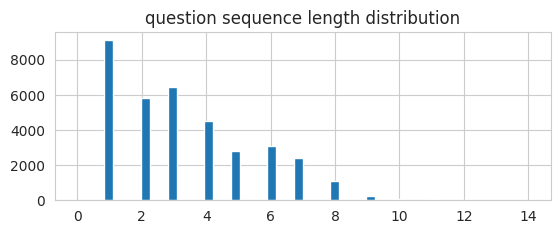

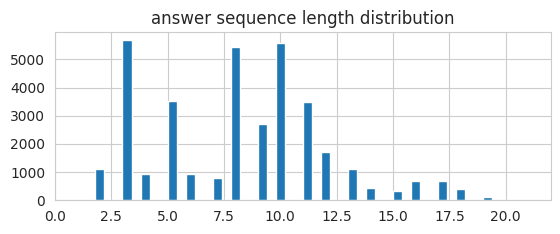

In [ ]:
# plot sequence length distribution to decide max length for padding
question_lengths = [len(s) for s in train_encoder_input]
print(f"maximum question sequence length >> {np.max(question_lengths)}")

answer_lengths = [len(s) for s in train_decoder_input]
print(f"maximum answer sequence length >> {np.max(answer_lengths)}")

plt.subplot(2,1,1)
plt.hist(question_lengths,bins=50)
plt.title('question sequence length distribution')
plt.show()

plt.subplot(2,1,2)
plt.hist(answer_lengths,bins=50)
plt.title('answer sequence length distribution')
plt.show()

In [ ]:
# padding to same length
train_encoder_input = pad_sequences(train_encoder_input, padding = 'post')
train_decoder_input = pad_sequences(train_decoder_input, padding = 'post')
train_decoder_label = pad_sequences(train_decoder_label, padding = 'post')

print('Sample training data: ')
print(train_encoder_input[0])
print(train_decoder_input[0])
print(train_decoder_label[0])

question_sequence_size = train_encoder_input.shape[1]
answer_sequence_size = train_decoder_input.shape[1]

test_encoder_input = pad_sequences(test_encoder_input, padding = 'post',maxlen = question_sequence_size)
test_decoder_input = pad_sequences(test_decoder_input, padding = 'post',maxlen = answer_sequence_size)
test_decoder_label = pad_sequences(test_decoder_label, padding = 'post',maxlen = answer_sequence_size)

print('Sample testing data: ')
print(test_encoder_input[0])
print(test_decoder_input[0])
print(test_decoder_label[0])

Sample training data: 
[  7   6 237 187   0   0   0   0   0   0   0   0   0   0]
[  2   8  19  15   4  18  16  13  17  20 211   0   0   0   0   0   0   0
   0   0   0]
[  8  19  15   4  18  16  13  17  20 211   3   0   0   0   0   0   0   0
   0   0   0]
Sample testing data: 
[14 18  4  0  0  0  0  0  0  0  0  0  0  0]
[ 2 12  1  6  4  5 43 70 10  1 11  0  0  0  0  0  0  0  0  0  0]
[12  1  6  4  5 43 70 10  1 11  3  0  0  0  0  0  0  0  0  0  0]


# BiLSTM Modeling

In [ ]:
# prepare for BiLSTM modeling

df['decoder_input'] = df.Answer.apply(lambda x: 'sos '+x)
df['decoder_label'] = df.Answer.apply(lambda x: x+' eo>')
df.head()

<ipython-input-57-92610f7f17b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decoder_input'] = df.Answer.apply(lambda x: 'sos '+x)
<ipython-input-57-92610f7f17b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decoder_label'] = df.Answer.apply(lambda x: x+' eo>')


,Question,Answer,decoder_input,decoder_label
0,hey,hello which drink can i get for you,sos hello which drink can i get for you,hello which drink can i get for you eo>
1,that is correct,great can i take your name api call getcustome...,sos great can i take your name api call getcus...,great can i take your name api call getcustome...
2,keri russell,your order will be ready at the next counter keri,sos your order will be ready at the next count...,your order will be ready at the next counter k...
3,thank you,have a nice day,sos have a nice day,have a nice day eo>
4,hello,hello which drink can i get for you,sos hello which drink can i get for you,hello which drink can i get for you eo>


In [ ]:
encoder_input = np.array(df.Question)
decoder_input = np.array(df.decoder_input)
decoder_label = np.array(df.decoder_label)

n_rows = df.shape[0]
print(f"{n_rows} rows")

indices = np.arange(n_rows)
np.random.shuffle(indices)

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_label = decoder_label[indices]

train_size = 0.8

train_encoder_input = encoder_input[:int(n_rows*train_size)]
train_decoder_input = decoder_input[:int(n_rows*train_size)]
train_decoder_label = decoder_label[:int(n_rows*train_size)]

test_encoder_input = encoder_input[int(n_rows*train_size):]
test_decoder_input = decoder_input[int(n_rows*train_size):]
test_decoder_label = decoder_label[int(n_rows*train_size):]

print(train_encoder_input.shape)
print(train_decoder_input.shape)
print(train_decoder_label.shape)

print(test_encoder_input.shape)
print(test_decoder_input.shape)
print(test_decoder_label.shape)

44631 rows
(35704,)
(35704,)
(35704,)
(8927,)
(8927,)
(8927,)


In [ ]:
q_tok = Tokenizer()
q_tok.fit_on_texts(train_encoder_input)
print(len(q_tok.word_counts))

a_tok = Tokenizer()
a_tok.fit_on_texts(train_decoder_input)
a_tok.fit_on_texts(train_decoder_label)
print(len(a_tok.word_counts))

train_encoder_input = q_tok.texts_to_sequences(train_encoder_input)
test_encoder_input = q_tok.texts_to_sequences(test_encoder_input)

train_decoder_input = a_tok.texts_to_sequences(train_decoder_input)
test_decoder_input = a_tok.texts_to_sequences(test_decoder_input)

train_decoder_label = a_tok.texts_to_sequences(train_decoder_label)
test_decoder_label = a_tok.texts_to_sequences(test_decoder_label)

question_word_size = len(q_tok.word_counts)
question_vocab_size = question_word_size+1

answer_word_size = len(a_tok.word_counts)
answer_vocab_size = answer_word_size+1

2986
2873


maximum question sequence length >> 14
maximum answer sequence length >> 21


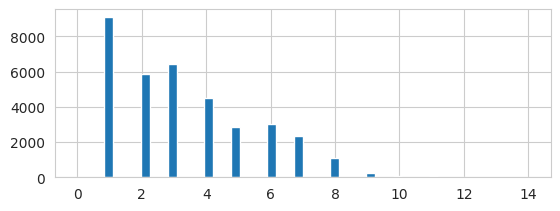

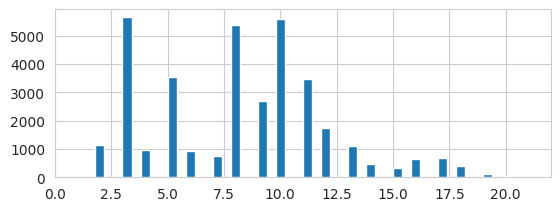

In [ ]:
question_lengths = [len(s) for s in train_encoder_input]
print(f"maximum question sequence length >> {np.max(question_lengths)}")

answer_lengths = [len(s) for s in train_decoder_input]
print(f"maximum answer sequence length >> {np.max(answer_lengths)}")

plt.subplot(2,1,1)
plt.hist(question_lengths,bins=50)
plt.show()

plt.subplot(2,1,2)
plt.hist(answer_lengths,bins=50)
plt.show()

In [ ]:
train_encoder_input = pad_sequences(train_encoder_input,padding='post')
train_decoder_input = pad_sequences(train_decoder_input,padding='post')
train_decoder_label = pad_sequences(train_decoder_label,padding='post')

print(train_encoder_input.shape)
print(train_decoder_input.shape)
print(train_decoder_label.shape)

question_sequence_size = train_encoder_input.shape[1]
answer_sequence_size = train_decoder_input.shape[1]

test_encoder_input = pad_sequences(test_encoder_input,padding='post',maxlen=question_sequence_size)
test_decoder_input = pad_sequences(test_decoder_input,padding='post',maxlen=answer_sequence_size)
test_decoder_label = pad_sequences(test_decoder_label,padding='post',maxlen=answer_sequence_size)

print(test_encoder_input.shape)
print(test_decoder_input.shape)
print(test_decoder_label.shape)

(35704, 14)
(35704, 21)
(35704, 21)
(8927, 14)
(8927, 21)
(8927, 21)


In [ ]:
# modeling

embedding_size=256

#trainer model

hidden_size = 256

encoder_input = Input(shape=[question_sequence_size])
# encoder_embedding = Embedding(question_vocab_size,embedding_size,mask_zero=True,trainable=False,weights=[question_embedding_matrix])
encoder_embedding = Embedding(question_vocab_size,embedding_size,mask_zero=True)
encoder_embedded = encoder_embedding(encoder_input)

lstm1 = Bidirectional(LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.3,recurrent_dropout=0.3))
encoder_output1,_,_,_,_ = lstm1(encoder_embedded)
lstm2 = Bidirectional(LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.3,recurrent_dropout=0.3))
encoder_output2,_,_,_,_ = lstm2(encoder_output1)
lstm3 = Bidirectional(LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.3,recurrent_dropout=0.3))
encoder_output3,encoder_forward_h3,encoder_forward_c3,encoder_backward_h3,encoder_backward_c3= lstm3(encoder_output2)

encoder_h3 = Concatenate(axis=-1)([encoder_forward_h3,encoder_backward_h3])
encoder_dense_h = Dense(hidden_size)
encoder_h3 = encoder_dense_h(encoder_h3)

encoder_c3 = Concatenate(axis=-1)([encoder_forward_c3,encoder_backward_c3])
encoder_dense_c = Dense(hidden_size)
encoder_c3 = encoder_dense_c(encoder_c3)

decoder_input = Input(shape=(None,))
# decoder_embedding = Embedding(answer_vocab_size,embedding_size,mask_zero=True,trainable=False,weights=[answer_embedding_matrix])
decoder_embedding = Embedding(answer_vocab_size,embedding_size,mask_zero=True)
decoder_embedded = decoder_embedding(decoder_input)

decoder_lstm = LSTM(hidden_size,return_sequences=True,return_state=True)
decoder_output,_,_ = decoder_lstm(decoder_embedded,initial_state=[encoder_h3,encoder_c3])

dense1 = Dense(512,activation='relu')
decoder_output = dense1(decoder_output)

decoder_softmax = Dense(answer_vocab_size,activation='softmax')
decoder_output = decoder_softmax(decoder_output)

In [ ]:
trainer = Model([encoder_input,decoder_input],decoder_output)
trainer.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_hist = trainer.fit([train_encoder_input,train_decoder_input],train_decoder_label,epochs=60,validation_split=0.1,batch_size=32)
#train_hist = trainer.fit([train_encoder_input,train_decoder_input],train_decoder_label,epochs=2,validation_split=0.1,batch_size=32)

Epoch 1/60
1005/1005 [==============================] - 386s 353ms/step - loss: 1.2112 - accuracy: 0.7681 - val_loss: 0.7522 - val_accuracy: 0.8487
Epoch 2/60
1005/1005 [==============================] - 341s 339ms/step - loss: 0.7069 - accuracy: 0.8499 - val_loss: 0.7221 - val_accuracy: 0.8563
Epoch 3/60
1005/1005 [==============================] - 339s 338ms/step - loss: 0.6583 - accuracy: 0.8537 - val_loss: 0.7271 - val_accuracy: 0.8586
Epoch 4/60
1005/1005 [==============================] - 341s 339ms/step - loss: 0.6257 - accuracy: 0.8557 - val_loss: 0.7265 - val_accuracy: 0.8590
Epoch 5/60
1005/1005 [==============================] - 340s 338ms/step - loss: 0.5919 - accuracy: 0.8584 - val_loss: 0.7182 - val_accuracy: 0.8610
Epoch 6/60
1005/1005 [==============================] - 340s 338ms/step - loss: 0.5606 - accuracy: 0.8608 - val_loss: 0.7405 - val_accuracy: 0.8622
Epoch 7/60
1005/1005 [==============================] - 340s 338ms/step - loss: 0.5332 - accuracy: 0.8629 - val_

In [ ]:
trainer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 14)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 14, 256)      764672      ['input_1[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  [(None, 14, 512),    1050624     ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256),                                                     
                                 (None, 256),                                                 

In [ ]:
pickle.dump(trainer, open(path + 'BiLSTM_Liya.pkl', 'wb'))

In [ ]:
pickle.dump(trainer, open(path + 'BiLSTM_Liya_60.pkl', 'wb'))

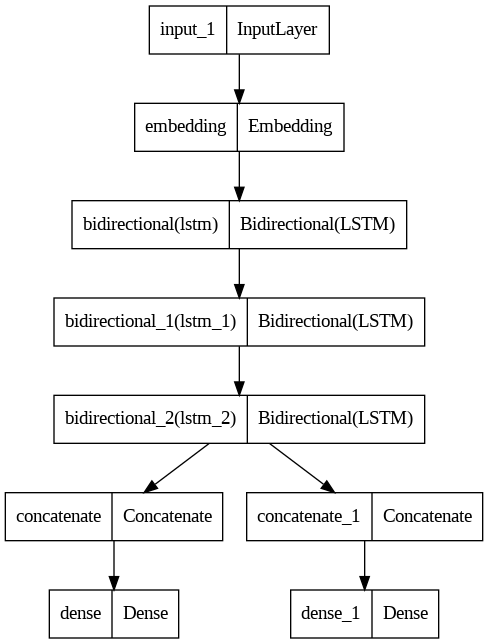

In [ ]:
from keras.utils import plot_model

#generator model
gen_encoder = Model(encoder_input,[encoder_h3,encoder_c3])

gen_decoder_h_input = Input(shape=[hidden_size])
gen_decoder_c_input = Input(shape=[hidden_size])

gen_decoder_embedded = decoder_embedding(decoder_input)
gen_decoder_output,gen_decoder_h,gen_decoder_c = decoder_lstm(gen_decoder_embedded,initial_state=[gen_decoder_h_input,gen_decoder_c_input])
gen_decoder_output = dense1(gen_decoder_output)
gen_decoder_output = decoder_softmax(gen_decoder_output)

gen_decoder = Model([decoder_input]+[gen_decoder_h_input,gen_decoder_c_input],[gen_decoder_output]+[gen_decoder_h,gen_decoder_c])

plot_model(gen_encoder)

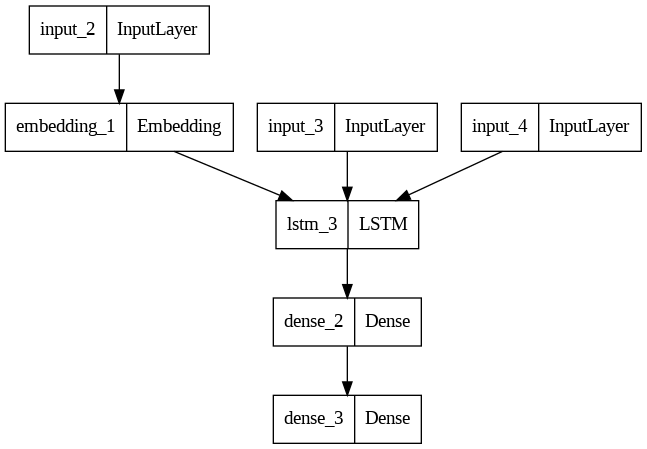

In [ ]:
plot_model(gen_decoder)

In [ ]:
train_hist